## Lecture Fourier Transform 1
---

### Introduction

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('XbCurHBeJ2M', width=380, height=220)

This lecture deals with the **Fourier transform**, which can be regarded as a continuous analogue of the Fourier series. 
The are many applications of the Fourier transform, one of which is signal processing. Hence we will begin this chapter with an analysis of two very important signals: 

- The first signal is a single pulse at a certain time (so called $\delta$ function). This signal is important, since any signal may be viewed as a continuous stringing together of such single pulses.
- The second signal is the so called step function which represents a signal that switches on at a specified time and stays switched on indefinitely.

#### The Dirac delta function ($\delta$ function)

The Dirac delta function $\delta(t)$ is simply spoken a single pulse at time $t=0$. The function
is defined as
$$
\delta(t) = \lim\limits_{\epsilon\rightarrow 0}\delta_{\epsilon}(t) = \lim\limits_{\epsilon\rightarrow 0} \frac{1}{\sqrt{\pi \epsilon}}e^{-\frac{t^2}{\epsilon}}\,.
$$
The functions $\delta_{\epsilon}(t)$ are depicted in the figure below for various values of $\epsilon$ (as you can see the functions get taller and narrower as $\epsilon$ decreases).

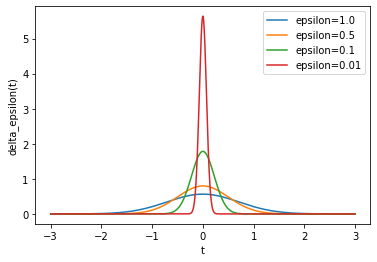

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = 3
t = np.linspace(-L,L,1000)
eps = np.array([1,0.5,0.1,0.01])


for e in eps:
    delta_function = 1.0/np.sqrt(np.pi*e)*np.exp(-t**2/e)
    plt.plot(t,delta_function,label='epsilon={}'.format(e))
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('delta_epsilon(t)')

#### Heaviside-Function

The Heaviside- or Step-Function $H(t)$ is defined as
$$
H(t) = \begin{cases} 1& t>0 \\ 0 & t<0 \end{cases}
$$
and is depicted in the figure below

No handles with labels found to put in legend.


Text(0, 0.5, 'H(t)')

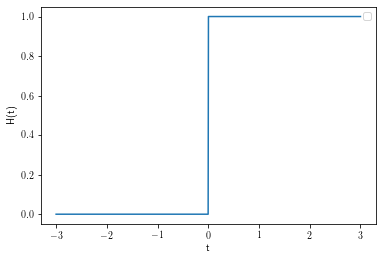

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

L = 3
t = np.linspace(-L,L,1000)

heaviside_function = np.zeros(t.size)
heaviside_function[np.where(t>0)] = 1 
plt.plot(t,heaviside_function)
plt.legend()
plt.xlabel(r't')
plt.ylabel(r'H(t)')

The derivative of the Heaviside function is given by
$$
H'(t) = \delta(t)\,.
$$
For the $\delta$-function the following rules apply
$$
\int\limits_{-\infty}^{\infty} \delta(t-t_0)f(t)\mathrm{d}t = f(t_0),\qquad \int\limits_{-\infty}^{\infty} e^{i(\omega_1-\omega_2)t}\mathrm{d}t = 2\pi \delta(\omega_1-\omega_2)\, .
$$

### The Fourier-Transform

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('KaAfplLWkp8', width=380, height=220)

#### Reminder: Fourier-Series
The Fourier Series expresses any perdiodic signal $f(t)$ (with period $T$, i.e. $t\in \left[-\frac{T}{2},\frac{T}{2}\right]$) as a superposition of $\sin(\omega_n t)$ and $\cos(\omega_n t)$
functions (in the complex notation $\sin(\omega_n t)$ and $\cos(\omega_n t)$ are combined in the exponential function $e^{i\omega_n t}$):
$$
f(t) = \sum_{n=-\infty}^{\infty}c_n e^{i\frac{2\pi}{T}nt} = \sum_{n=-\infty}^{\infty}c_n e^{i\omega_nt}\qquad \mathrm{with}\quad 
\omega_n = \frac{2\pi}{T}n\, .
$$
The coefficients $c_n$ are obtained via
$$
c_n = \langle e^{i\omega_n t}, f(t) \rangle  = \frac{1}{T}\int_{-T/2}^{T/2}f(t) e^{-i\omega_n t}\mathrm{d}t\,. 
$$
The Fourier is the generalization of the Fourier series for non-periodics functions, i.e. $T\rightarrow \infty$.
For $T\rightarrow \infty$ the spacing between to adjacent frequencies 
$$
\Delta \omega = \omega_{n+1}-\omega_n = \frac{2\pi}{T}
$$
tends to zero. In other words: Instead of having discrete frequency $\omega_n$ with discrete Fourier
coefficients $c_n$ we end up with a continuous frequency $\omega$ with a corresponding coefficient function $c(\omega)$. This coefficient function is called the Fourier transform and is will be defined in the subsequent chapter.
#### Definition of the Fourier Transform
The **Fourier transform** $F(\omega)$ (this is the coefficient function $c(\omega)$ mentioned in the introduction) of a function $f(t)$ is defined as
$$
F(\omega) = \int\limits_{-\infty}^{\infty}f(t)e^{-i\omega t}\mathrm{d}t\,  = \cal{F}(f(t)).
$$
The inverse Fourier transform is given by
$$
f(t) = \frac{1}{2\pi}\int\limits_{-\infty}^{\infty}F(\omega)e^{i\omega t}\mathrm{d}\omega = \cal{F}^{-1}(F(\omega))\,.
$$

#### Examples
- As a first example we consider the function
$$
f(t) = \delta(t)
$$
The Fourier transform is found as
$$
F(\omega) = \int\limits_{-\infty}^{\infty}\delta(t)e^{-i\omega t}\mathrm{d}t = 1
$$
- As a second example we consider the function
$$
f(t) = e^{-a|t|}\quad (a>0)\,.
$$
The Fourier transform is found as
$$
F(\omega) = \int\limits_{-\infty}^{0}e^{at}e^{-i\omega t}\mathrm{d}t 
+ \int\limits_{0}^{\infty}e^{-at}e^{-i\omega t}\mathrm{d}t 
= \int\limits_{-\infty}^{0}e^{(a-i\omega) t}\mathrm{d}t 
+ \int\limits_{0}^{\infty}e^{-(a+i\omega) t}\mathrm{d}t =
\frac{1}{a-i\omega} - \frac{1}{-(a+i\omega)} = \frac{2a}{a^2+\omega^2}
$$
We have used that
$$
e^{-at}\rightarrow 0 \quad \mathrm{for}\quad t\rightarrow \infty
$$
Both, the function $f(t)$ and its Fourier transform $F(\omega)$ are depicted in the figure below.

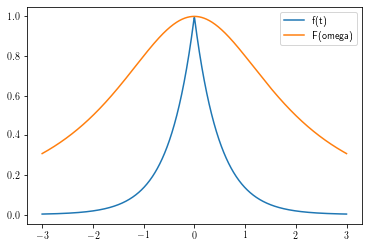

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rc('text', usetex=True)

L = 3
t = np.linspace(-L,L,1000)
omega = t
a = 2

func = np.exp(-a*np.abs(t))
func_fourier = 2*a/(a**2+omega**2)

plt.plot(t,func,label='f(t)')
plt.plot(omega,func_fourier,label='F(omega)')
plt.legend()
#plt.xlabel(r't')
#plt.ylabel(r'H(t)')

#### Important Fourier transforms

The table below lists important Fourier transforms.

| Function $f(t)$              | Fourier transform $F(\omega)$   |
|-----------------------------|---------------------------------|
|   $\delta(t)  $             | $ 1 $                           |
|   $ \delta^{(n)}(t)$        | $  (i\omega)^n$                 |
|   $e^{iat} $                | $  2\pi \delta(\omega-a) $ |
|   $\cos(at) $               | $ \pi \left[\delta(\omega+a)  +  \delta(\omega-a)\right] $ |
|   $ \sin(at) $              | $ i\pi\left[\delta(\omega+a)  - \delta(\omega-a)\right] $ |
|   $ \theta(t)$              | $ \frac{1}{i\omega} + \pi\delta(\omega) $ |
|   $\theta(t+a)-\theta(t-a)$ | $ \frac{2\sin(a\omega)}{\omega} $ |
|   $ \theta(t)e^{-at} $      | $ \frac{1}{a+i\omega} $ |
|   $ e^{-at^2} $             | $ \sqrt{\frac{\pi}{a}}e^{-\frac{\omega^2}{4a}} $ |

#### Properties of the Fourier transform
Important properties of the Fourier transform are listed in the table below.

|     $ $             | Function $f(t)$             | Fourier transform $F(\omega)$   |
|------------------|-----------------------------|---------------------------------|
| Linearity        | $a_1f_1(t) + a_2f_2(t) $    | $ a_1F_1(\omega) + a_2F_2(\omega) $ |
| Scaling          | $f(at) $                    | $ \frac{1}{|a|}F_1\left(\frac{\omega}{a}\right) $ |
| Time shift       | $ f(t-a)$                   | $  F(\omega)e^{-i\omega a} $ |
| Frequency shift  | $ f(t)e^{iax} $             | $F(\omega-a)$ |
| Differentation   | $f^{(n)}(t) $               | $ (i\omega)^nF(\omega) $ |
| Differentation   | $t^nf(t) $                  | $ i^nF^{(n)}(\omega)  $ |

